In [7]:
from rdkit import Chem
from rdkit.Chem import rdchem

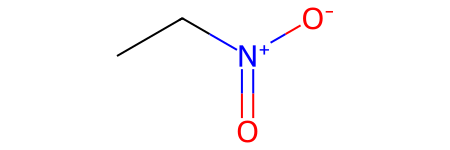

In [20]:
# Sample SMILES string for testing
smiles = 'CCN(=O)=O'  # Example molecule: Nitramine
mol = Chem.MolFromSmiles(smiles)
mol

# Molecular Sanitization
The molecule parsing functions all, by default, perform a “sanitization” operation on the molecules read. The idea is to generate useful computed properties (like hybridization, ring membership, etc.) for the rest of the code and to ensure that the molecules are “reasonable”: that they can be represented with octet-complete Lewis dot structures.

1. clearComputedProps: This step ensures a clean slate by removing any previously computed properties from the molecule's atoms and bonds.
2. cleanUp: This focuses on fixing non-standard valence states, such as transforming neutral five-valent nitrogen or phosphorus into more chemically correct zwitterionic forms.

3. cleanUpOrganometallics: Specifically addresses unusual bonding situations in organometallic compounds by converting hypervalent atom-metal bonds into dative bonds.

4. updatePropertyCache: This calculates both explicit and implicit valences of atoms, detecting any incorrect valences and flagging them.

5. symmetrizeSSSR: Runs the smallest set of smallest rings (SSSR) algorithm, an important step for determining the ring structures of the molecule, ensuring they are appropriately symmetrized.

6. Kekulize: This converts aromatic bonds in rings into their Kekulé form, raising exceptions if the structure cannot be appropriately Kekulized (if, for example, aromatic bonds exist outside of rings).

7. assignRadicals: Calculates the number of radical electrons on atoms, which is crucial for accurately representing molecules with radical species.

8. setAromaticity: Sets the aromatic flag on atoms and bonds, identifies aromatic rings and adjusts bond orders where appropriate.

9. setConjugation: Identifies conjugated bonds, ensuring that systems like alternating single and double bonds are represented correctly.

10. setHybridization: Determines the hybridization state of each atom, which affects how atoms bond and orient in 3D space.

11. cleanupChirality: This step removes chiral tags from atoms that aren't sp3 hybridized, ensuring stereochemistry is only applied where it makes sense.

12. adjustHs: Adds explicit hydrogens as necessary to ensure that heteroatoms (like nitrogen in pyrrole) are correctly handled.

13. updatePropertyCache (again): A second call to this step ensures that any changes made during sanitization (like adding hydrogens) are reflected in the molecule’s valence calculations.

In [9]:
# Remove any computed properties
def clear_computed_props(mol):
    mol.ClearComputedProps()

In [24]:
# Sanitize molecule with all the available options.
# You can customize this by turning on or off different steps.

def sanitize_molecule(mol, sanitize_flags):
    try:
        # Apply specific sanitization steps
        Chem.SanitizeMol(mol, sanitize_flags)
        print("Sanitization successful.")
        print(Chem.MolToSmiles(mol), "\n")
    except Exception as e:
        print(f"Sanitization failed: {e}")

In [16]:
# (1) Clear Computed Properties
clear_computed_props(mol)

In [25]:
# (2) Cleaning Up (standard valence adjustments)
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_CLEANUP)

Sanitization successful.
CC[N+](=O)[O-] 



In [28]:
#(3) Update Property Cache (calculate explicit and implicit valences)
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_PROPERTIES)


Sanitization successful.
CC[N+](=O)[O-] 



In [29]:
# (4) Symmetrize Smallest Set of Smallest Rings (SSSR)
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_SYMMRINGS)

Sanitization successful.
CC[N+](=O)[O-] 



In [30]:
# (5) Kekulize (convert aromatic rings to Kekule forms)
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_KEKULIZE)

Sanitization successful.
CC[N+](=O)[O-] 



In [32]:
# (6) Set Aromaticity (identify aromatic rings)
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_SETAROMATICITY)

Sanitization successful.
CC[N+](=O)[O-] 



In [34]:
# (7) Set Conjugation (identify conjugated bonds)
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION)

Sanitization successful.
CC[N+](=O)[O-] 



In [35]:
# (8) Set Hybridization (determine hybridization states)
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION)

Sanitization successful.
CC[N+](=O)[O-] 



In [36]:
# (9) Cleanup Chirality (remove chiral tags from non-sp3 hybridized atoms)
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_CLEANUPCHIRALITY)

Sanitization successful.
CC[N+](=O)[O-] 



In [37]:
# (10) Adjust Hydrogens (add explicit hydrogens where needed)
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_ADJUSTHS)

Sanitization successful.
CC[N+](=O)[O-] 



In [38]:
# (11) Combination: Kekulize and Set Aromaticity
sanitize_molecule(mol, Chem.SanitizeFlags.SANITIZE_KEKULIZE | Chem.SanitizeFlags.SANITIZE_SETAROMATICITY)

Sanitization successful.
CC[N+](=O)[O-] 



In [39]:
# Print the molecule to check the result
print(Chem.MolToSmiles(mol))

CC[N+](=O)[O-]
